<a href="https://colab.research.google.com/github/Chanito/mlbourbaki/blob/main/Notebooks/Regresi%C3%B3n_log%C3%ADstica_usando_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cargar Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
datos = pd.read_csv('https://raw.githubusercontent.com/AnIsAsPe/LogisticRegression_SpamOpinion/master/Datos/deceptive-opinion.csv',
                    usecols=['deceptive','text']
                    )
print(datos.shape)
datos.head()

(1600, 2)


,deceptive,text
0,truthful,We stayed for a one night getaway with family ...
1,truthful,Triple A rate with upgrade to view room was le...
2,truthful,This comes a little late as I'm finally catchi...
3,truthful,The Omni Chicago really delivers on all fronts...
4,truthful,I asked for a high floor away from the elevato...


In [3]:
#datos['polarity'].value_counts()
datos['deceptive'].value_counts()

truthful     800
deceptive    800
Name: deceptive, dtype: int64

In [4]:
datos['deceptive'] = np.where(datos['deceptive']=='deceptive', 1, 0)
datos['deceptive'].value_counts()

1    800
0    800
Name: deceptive, dtype: int64

## Preprocesamiento de textos

In [6]:
def preprocesar(texto):
  #convierte a minúsculas
  texto = (texto).lower()

  #elimina stopwords
  stop = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
  texto = stop.sub('', texto) 

  #quita puntuaciones y números
  texto = re.sub('[^a-z]+', ' ', texto)

  #lematizar y quedarnos con palabras que tengan más de tres caracteres
  st = PorterStemmer()
  texto = texto.split()
  texto = ' '.join([st.stem(i) for i in texto])
  
  return(texto)

In [7]:
datos['text_pp'] = datos['text'].apply(preprocesar)
datos

,deceptive,text,text_pp
0,0,We stayed for a one night getaway with family ...,stay one night getaway famili thursday tripl a...
1,0,Triple A rate with upgrade to view room was le...,tripl rate upgrad view room less also includ b...
2,0,This comes a little late as I'm finally catchi...,come littl late final catch review past sever ...
3,0,The Omni Chicago really delivers on all fronts...,omni chicago realli deliv front spacious room ...
4,0,I asked for a high floor away from the elevato...,ask high floor away elev got room pleasantli d...
...,...,...,...
1595,1,Problems started when I booked the InterContin...,problem start book intercontinent chicago onli...
1596,1,The Amalfi Hotel has a beautiful website and i...,amalfi hotel beauti websit interior decor wife...
1597,1,The Intercontinental Chicago Magnificent Mile ...,intercontinent chicago magnific mile outsid ho...
1598,1,"The Palmer House Hilton, while it looks good i...",palmer hous hilton look good pictur outsid act...


# Vectorización de Texto mediante BOW

In [8]:
vectorizer = TfidfVectorizer(min_df=2)
BOW = vectorizer.fit_transform(datos['text_pp'])
BOW.shape

(1600, 3616)

In [9]:
palabras = vectorizer.get_feature_names()
pd.DataFrame(BOW.todense(), index=datos.index, columns=palabras)


,aaa,abil,abl,abrupt,absenc,absent,absolut,absurd,abund,abysm,ac,accent,accept,access,accident,accomad,accomid,accommod,accomod,accompani,accomplish,accord,account,accur,accus,accustom,ach,acknowledg,acquaint,across,act,action,activ,actual,ad,add,addit,address,adequ,adjac,...,worn,worri,wors,worst,worth,worthi,woudl,would,wouldnt,wow,wrap,wrigley,wrinkl,write,written,wrong,wrote,ye,yeah,year,yearli,yell,yellow,yelp,yep,yesterday,yet,yield,yoga,yogurt,york,young,younger,yr,yuck,yummi,yup,zest,zone,zoo
0,0.1882,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.111565,0.0,0.0,0.056084,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.304154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0000,0.0,0.084973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.043475,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.181761,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.096682,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1596,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.136929,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.128338,0.0,0.0,0.129032,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1597,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.111367,0.0,0.0,0.0,0.0,0.154996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.162156,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1598,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.158

# Dividir conjunto de entrenamiento y prueba

In [10]:
X = BOW.todense()
y = datos['deceptive']


In [11]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                     random_state=3)

In [12]:
#Conjunto de entrenamiento
X_train.shape, y_train.shape

((1280, 3616), (1280,))

In [13]:
#Conjunto de prueba
X_test.shape, y_test.shape

((320, 3616), (320,))

# Diseño del modelo de red neuronal usando TensorFlow

In [14]:
import tensorflow as tf  
print(tf.__version__)

2.5.0




TensorFlow y Keras, ambos proyectos para el aprendizaje profundo,tienen una historia entrelazada. Keras era un conjunto de abstracciones que facilita el aprendizaje profundo, pero necesitada de un backend, desde la versión de Keras v1.1.0 TensorFlow fue el backend predeterminado (antes era Theano).

A partir del lanzamiento de TensorFlow a mediados de 2019, Keras es ahora la API de alto nivel de TensorFlow para facilitar el diseño y entrenamiento de modelos rápidos y fáciles.  

[Video sobre TensorFlow 2.0](https://www.youtube.com/watch?v=EqWsPO8DVXk)

In [15]:
model = tf.keras.Sequential([                     # https://www.tensorflow.org/guide/keras/sequential_model
                             
        tf.keras.Input(shape=(3616,)),              # dimensiones de entrada
    
        tf.keras.layers.Dense( 
                              1,                     # dimensiones de salida
                              activation='sigmoid',  # función de activación  https://www.tensorflow.org/api_docs/python/tf/keras/activations
                              name="layer_1"         # nombre de la capa

                              )
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (Dense)              (None, 1)                 3617      
Total params: 3,617
Trainable params: 3,617
Non-trainable params: 0
_________________________________________________________________


Una alternativa para establecer las dimensiones de entrada en la primera capa es utilizar el parámetro `input_shape`

In [16]:
model = tf.keras.Sequential([
    
          tf.keras.layers.Dense(1, 
                                input_shape = (3616,),       # dimensiones de la entrada  
                                activation='sigmoid',        # para la regresión logística
                                name="layer_1"               # nombre de la capa
                                ),
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (Dense)              (None, 1)                 3617      
Total params: 3,617
Trainable params: 3,617
Non-trainable params: 0
_________________________________________________________________


Otra manera de construir un modelo secuencial es declrarlo y a continuación añadir capas ustilizando el método `add`

In [17]:
model = tf.keras.Sequential()
    
model.add(tf.keras.Input(shape=(3616,)))

model.add(tf.keras.layers.Dense(1,
                                  activation='sigmoid',        # para la regresión logística
                                  name="layer_1"   
                                 ))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (Dense)              (None, 1)                 3617      
Total params: 3,617
Trainable params: 3,617
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.add(tf.keras.layers.Dense(1,
                                  activation='sigmoid',       
                                  name="layer_2")  
                                  )
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (Dense)              (None, 1)                 3617      
_________________________________________________________________
layer_2 (Dense)              (None, 1)                 2         
Total params: 3,619
Trainable params: 3,619
Non-trainable params: 0
_________________________________________________________________


In [19]:
len(model.layers)  # layers es un atributo del modelo que regresa una lista con las capas del modelo

2

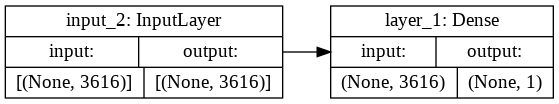

In [22]:
tf.keras.utils.plot_model( 
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="LR",
    dpi=96,
)

In [21]:

model.pop()    # borra la última capa
print(len(model.layers))
model.summary()


1
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (Dense)              (None, 1)                 3617      
Total params: 3,617
Trainable params: 3,617
Non-trainable params: 0
_________________________________________________________________


# Entrenamiento y validación


In [23]:
model.compile(optimizer='adam',             # stochastic gradient descent adaptativo
                                            # https://keras.io/api/optimizers/adam/
              
              loss='binary_crossentropy',   # función objetivo  que se busca minimizar
                                            # https://keras.io/api/losses/
              
              metrics=['accuracy']
              )


In [25]:
# model.fit(X_train, y_train, epochs=100, batch_size=100, validation_data=(X_test, y_test))
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
40/40 [==============================] - 0s 6ms/step - loss: 0.3408 - accuracy: 0.9719 - val_loss: 0.4808 - val_accuracy: 0.8500
Epoch 2/100
40/40 [==============================] - 0s 3ms/step - loss: 0.3350 - accuracy: 0.9727 - val_loss: 0.4778 - val_accuracy: 0.8469
Epoch 3/100
40/40 [==============================] - 0s 3ms/step - loss: 0.3297 - accuracy: 0.9727 - val_loss: 0.4747 - val_accuracy: 0.8500
Epoch 4/100
40/40 [==============================] - 0s 3ms/step - loss: 0.3244 - accuracy: 0.9742 - val_loss: 0.4717 - val_accuracy: 0.8500
Epoch 5/100
40/40 [==============================] - 0s 3ms/step - loss: 0.3194 - accuracy: 0.9734 - val_loss: 0.4686 - val_accuracy: 0.8531
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 0.3146 - accuracy: 0.9742 - val_loss: 0.4661 - val_accuracy: 0.8500
Epoch 7/100
40/40 [==============================] - 0s 3ms/step - loss: 0.3101 - accuracy: 0.9742 - val_loss: 0.4639 - val_accuracy: 0.8438
Epoch 8/100
4

# Red neuronal de clasificación con más de una capa

In [26]:
model = tf.keras.Sequential()
    
model.add((tf.keras.layers.InputLayer(input_shape=(3616,))))

model.add(tf.keras.layers.Dense(12, activation='sigmoid',name="hidden_layer_1" ))

model.add(tf.keras.layers.Dense(12, activation='sigmoid', name="hidden_layer_2"))

model.add(tf.keras.layers.Dense(1,activation='sigmoid', name="output_layer" ))



model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer_1 (Dense)       (None, 12)                43404     
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 12)                156       
_________________________________________________________________
output_layer (Dense)         (None, 1)                 13        
Total params: 43,573
Trainable params: 43,573
Non-trainable params: 0
_________________________________________________________________


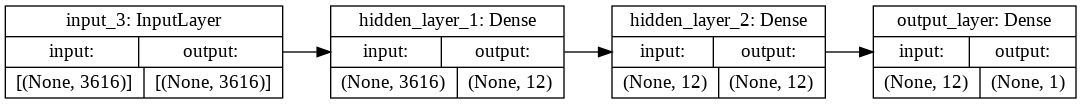

In [27]:
tf.keras.utils.plot_model( 
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="LR",
    dpi=96,
)

In [28]:
model.compile(optimizer='adam',             # stochastic gradient descent adaptativo
                                            # https://keras.io/api/optimizers/adam/
              
              loss='binary_crossentropy',   # función objetivo  que se busca minimizar
                                            # https://keras.io/api/losses/
              
              metrics=['accuracy']
              )
model.fit(X_train, y_train, epochs=100, batch_size=100, validation_data=(X_test, y_test))

Epoch 1/100
13/13 [==============================] - 1s 16ms/step - loss: 0.7382 - accuracy: 0.5156 - val_loss: 0.7670 - val_accuracy: 0.4375
Epoch 2/100
13/13 [==============================] - 0s 7ms/step - loss: 0.7134 - accuracy: 0.5156 - val_loss: 0.7372 - val_accuracy: 0.4375
Epoch 3/100
13/13 [==============================] - 0s 6ms/step - loss: 0.6988 - accuracy: 0.5156 - val_loss: 0.7160 - val_accuracy: 0.4375
Epoch 4/100
13/13 [==============================] - 0s 7ms/step - loss: 0.6911 - accuracy: 0.5156 - val_loss: 0.7026 - val_accuracy: 0.4375
Epoch 5/100
13/13 [==============================] - 0s 7ms/step - loss: 0.6870 - accuracy: 0.5156 - val_loss: 0.6959 - val_accuracy: 0.4375
Epoch 6/100
13/13 [==============================] - 0s 8ms/step - loss: 0.6845 - accuracy: 0.5156 - val_loss: 0.6924 - val_accuracy: 0.4375
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6825 - accuracy: 0.5219 - val_loss: 0.6894 - val_accuracy: 0.4437
Epoch 8/100


# Referencia:

1. Keras vs. tf.keras: What’s the difference in TensorFlow 2.0? [Internet]. PyImageSearch. 2019 [citado 20 de julio de 2021]. Disponible en: https://www.pyimagesearch.com/2019/10/21/keras-vs-tf-keras-whats-the-difference-in-tensorflow-2-0/
